# Flexible representation of quantum images - [FRQI](https://link.springer.com/content/pdf/10.1007/s11128-010-0177-y.pdf)

## Representation equation $| I(\theta)\rangle = \frac{1}{2^n}\sum_{i=0}^{2^{2n}-1}(cos\theta_i | 0 \rangle + sin\theta_i | 1 \rangle) \otimes | i \rangle$, where

$\theta_i$ - continuous representation of the inensity,

$i$ - binary expansion of the pixel coordinate.

Step 0: dependencies import

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data_FRQI = {}

In [3]:
def FRQI(thetas, coord_q_num, image):
    O = QuantumRegister(coord_q_num, 'coordinates')
    c = QuantumRegister(1,'c_reg')
    cr = ClassicalRegister(O.size+c.size, "cl_reg")

    qc_image = QuantumCircuit(c, O, cr)
    num_qubits = qc_image.num_qubits
    input_im = image.copy().flatten()
    qc_image.i(c)
    qc_image.h(O)

    controls_ = []
    for i, _ in enumerate(O):
        controls_.extend([O[i]])

    for i, theta in enumerate(thetas):
        qubit_index_bin = "{0:b}".format(i).zfill(coord_q_num)
        
        for k, qub_ind in enumerate(qubit_index_bin):
            if int(qub_ind):
                qc_image.x(O[k])
                
        # qc_image.barrier()
        # for coord_or_intns in (0,1):
        qc_image.mcry(theta=2*theta,
                    q_controls=controls_,
                    q_target=c[0])

        # qc_image.barrier()
        for k, qub_ind in enumerate(qubit_index_bin):
            if int(qub_ind):
                qc_image.x(O[k])
            
        # qc_image.barrier()

    qc_image.measure(list(reversed(range(qc_image.num_qubits))), list(range(cr.size)))
    return qc_image

Step 1: image generation

depth is 20.0, # of qubits is 3.0 With size of 2X2


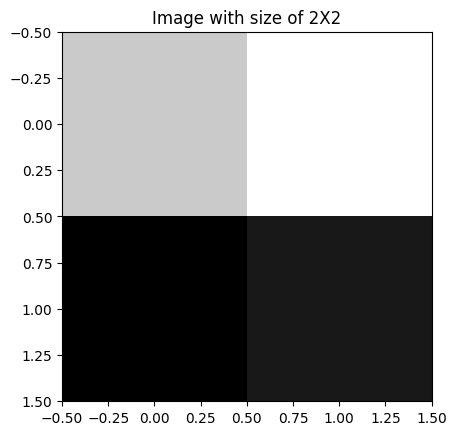

depth is 264.0, # of qubits is 5.0 With size of 3X3


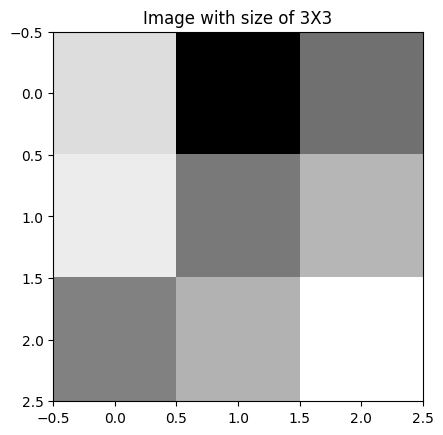

depth is 467.0, # of qubits is 5.0 With size of 4X4


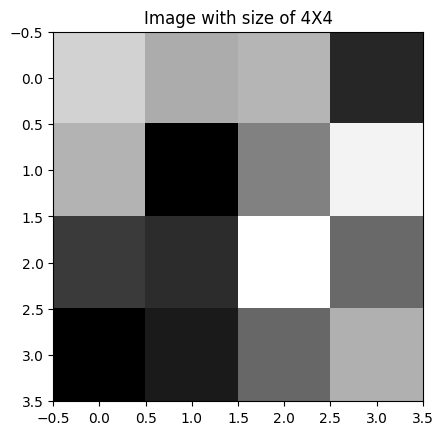

depth is 1528.0, # of qubits is 6.0 With size of 5X5


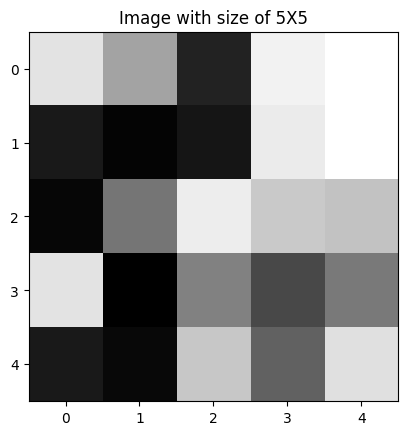

depth is 4503.0, # of qubits is 7.0 With size of 6X6


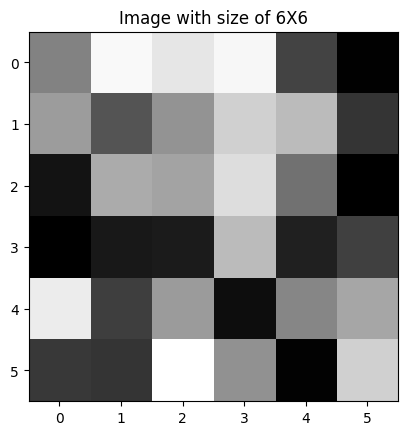

depth is 6128.0, # of qubits is 7.0 With size of 7X7


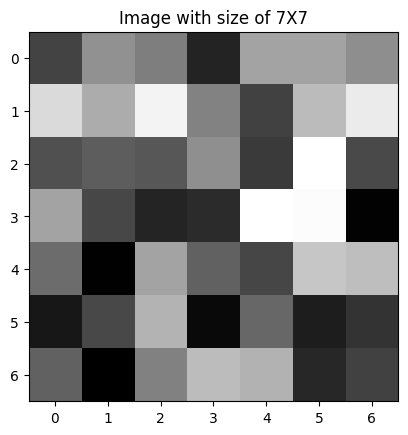

depth is 8003.0, # of qubits is 7.0 With size of 8X8


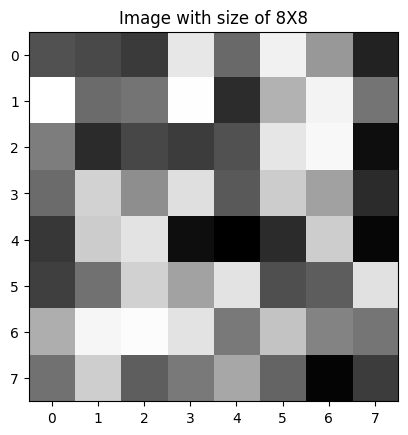

depth is 20496.0, # of qubits is 8.0 With size of 9X9


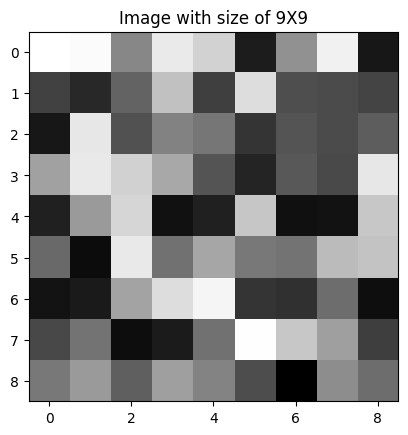

depth is 25303.0, # of qubits is 8.0 With size of 10X10


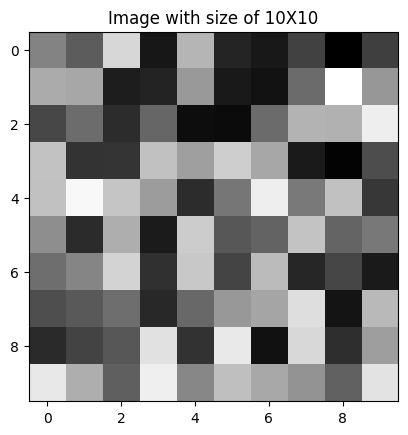

depth is 30616.0, # of qubits is 8.0 With size of 11X11


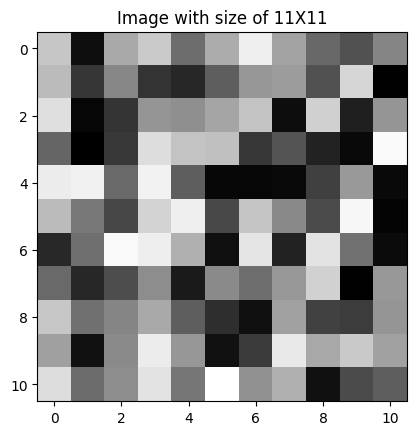

depth is 73299.0, # of qubits is 9.0 With size of 12X12


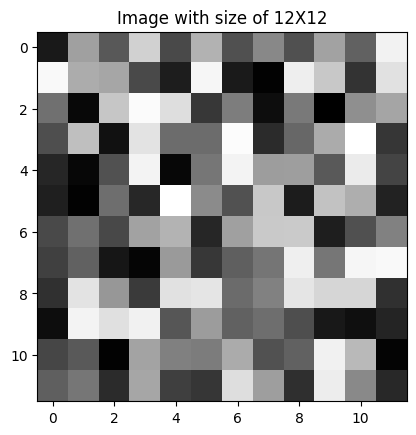

depth is 86024.0, # of qubits is 9.0 With size of 13X13


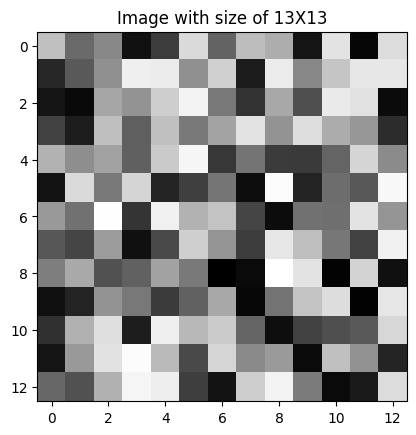

depth is 99767.0, # of qubits is 9.0 With size of 14X14


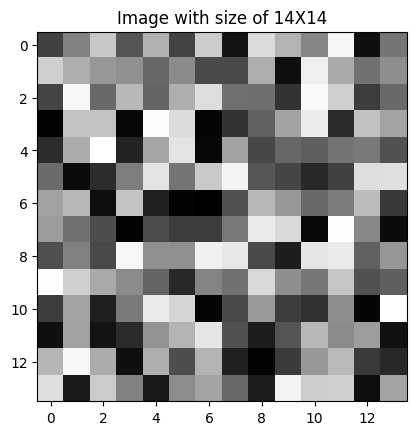

depth is 114528.0, # of qubits is 9.0 With size of 15X15


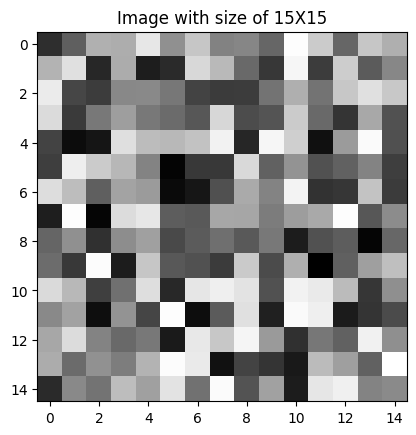

depth is 130307.0, # of qubits is 9.0 With size of 16X16


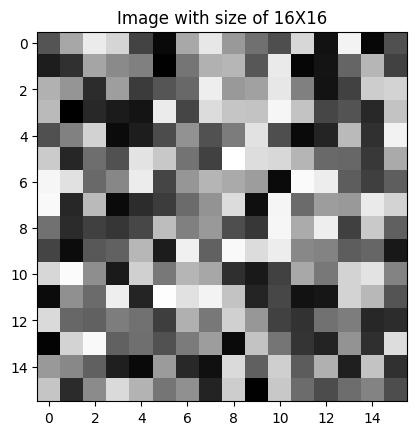

In [4]:
for n in range(2,17):
    temp = {"depth":[],"qubit":[]}
    for i in range(0,10):
        image = np.random.uniform(low=0, high=255, size=(n,n)).astype(int)
        input_im = image.copy().flatten()
        thetas = np.interp(input_im, (0, 256), (0, np.pi/2))
        coord_q_num = int(np.ceil(math.log(len(input_im), 2)))
        qc_image=FRQI(thetas, coord_q_num, image)
        temp["depth"].append(qc_image.depth())
        temp["qubit"].append(qc_image.num_qubits)
    print("depth is {}, # of qubits is {} With size of {}X{}".format(np.mean(temp["depth"]), np.mean(temp["qubit"]),n,n))
    plt.imshow(image, cmap='gray')
    plt.title('Image with size of {}X{}'.format(n,n))
    plt.show()
    data_FRQI[n]=temp

In [9]:
data=data_FRQI

In [25]:
#plot line graph with depth and qubit and margin of error on a log scale
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
        x=list(data.keys()),
        y=[np.mean(data[i]["depth"]) for i in data.keys()],
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            symmetric=False,
            array=[max(data[i]["depth"])-np.mean(data[i]["depth"]) for i in data.keys()],
            arrayminus=[max(np.mean(data[i]["depth"])-data[i]["depth"]) for i in data.keys()],
            visible=True)
       
    ))
fig.show()

In [24]:
#plot line graph with depth on a log scale with margin of error
import plotly.express as px

fig = px.scatter( x=list(data.keys()), y=[np.mean(data[i]["depth"]) for i in data.keys()],log_y=True)
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
        x=list(data.keys()),
        y=[np.mean(data[i]["qubit"]) for i in data.keys()],
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            symmetric=False,
            array=[max(data[i]["qubit"])-np.mean(data[i]["qubit"]) for i in data.keys()],
            arrayminus=[max(np.mean(data[i]["qubit"])-data[i]["qubit"]) for i in data.keys()],
            visible=False)
    ))
fig.show()

Metrics

| Image size  | Depth measure | # of utilized qubits 
| ------------- | ------------- | -------------------|
| 2  | 20  | 3 | 
| 4  | 467  | 5 | 
| 8  | 8003  | 7 | 
| 16  | 130307  | 9 |
| 32  | 2094083  | 
| 64  | -  
| 128  | -  
| 256  | -  